In [354]:
import pandas as pd 
import os
import numpy as np

os.chdir(r'C:\Users\nicho\OneDrive\Desktop\Bitcoin Regresssion Project')
BTC = pd.read_csv(r'BTC-USD.csv' , parse_dates = ['Date'], index_col=['Date'])
SNP = pd.read_csv(r'Standard&PoorsHistorical.csv', parse_dates = ['Date'], index_col=['Date'])
Margin = pd.read_csv(r'margin-statistics.csv')
CPI = pd.read_csv(r'CPIHistoricalData.csv', parse_dates = ['Date'], index_col= ['Date'])
BTC.head(), SNP.head(), Margin.head(), CPI.head()

(            Symbol     Open     High      Low    Close  Volume BTC  \
 Date                                                                 
 2020-04-10  BTCUSD  7315.25  7315.25  7315.25  7315.25        0.00   
 2020-04-09  BTCUSD  7369.60  7378.85  7115.04  7315.25     2237.13   
 2020-04-08  BTCUSD  7201.81  7432.23  7152.80  7369.60     2483.60   
 2020-04-07  BTCUSD  7336.96  7468.42  7078.00  7201.81     2333.34   
 2020-04-06  BTCUSD  6775.21  7369.76  6771.01  7336.96     3727.47   
 
              Volume USD  
 Date                     
 2020-04-10         0.00  
 2020-04-09  16310014.53  
 2020-04-08  18138080.27  
 2020-04-07  17047120.32  
 2020-04-06  26533750.17  ,
             Close/Last Volume     Open     High      Low
 Date                                                    
 2021-12-31     4766.18     --  4775.21  4786.83  4765.75
 2021-12-30     4778.73     --  4794.23  4808.93  4775.33
 2021-12-29     4793.06     --  4788.64  4804.06  4778.08
 2021-12-28     4786.

In [355]:
#Dropping irrelevant features

Drop = ['Symbol', 'Open', 'High', 'Low', 'Volume BTC']
BTCDrop = BTC.drop(Drop, axis = 1)

Drop1 = ['Volume', 'Open', 'High', 'Low']
SNPDrop = SNP.drop(Drop1, axis = 1)


Drop3 = ['Open', 'High', 'Low', 'Volume']
CPIDrop = CPI.drop(Drop3, axis = 1)

Drop4 = ['Free Credit Balances in Customers\' Cash Accounts', 'Free Credit Balances in Customers\' Securities Margin Accounts']
MarginDrop = Margin.drop(Drop4, axis =1)

In [356]:
#Renaming Columns
BTCDrop.rename(columns = {'Close': 'BTC', 
                          'Volume USD': 'Liquidity'}, inplace = True)

SNPDrop.rename(columns = {'Close/Last': 'SNP close'}, inplace = True)

CPIDrop.rename(columns = {'Close/Last': 'CPI close'}, inplace = True)

  #Reversing order of DF
MarginDrop.rename(columns = {'Year-Month' : 'Date'}, inplace = True)

In [357]:
#Converting feature samples to monthly 
BTCMonthly = BTCDrop.resample('M').median()
CPIMonthly = CPIDrop.resample('M').median()
SNPMonthly = SNPDrop.resample('M').median()

#Setting index back to default
BTCMonthly.reset_index(inplace = True)
SNPMonthly.reset_index(inplace = True)
CPIMonthly.reset_index(inplace = True)

#Changing layout to use as key for merge
BTCMonthly['Date'] = BTCMonthly['Date'].dt.strftime('%Y-%m')
SNPMonthly['Date'] = SNPMonthly['Date'].dt.strftime('%Y-%m')
CPIMonthly['Date'] = CPIMonthly['Date'].dt.strftime('%Y-%m')

In [358]:
#Dataframe with Margin feature

MarginMerged = pd.merge(pd.merge(pd.merge(MarginDrop, BTCMonthly, on = 'Date'), SNPMonthly, on = 'Date'), CPIMonthly, on = 'Date')
MarginMerged = MarginMerged[::-1] #Flipping the dataset to have earliest dates first

In [359]:
#Cleaning comma from Margin acct. feature
NewDebitCol = MarginMerged['Debit Balances in Customers\' Securities Margin Accounts']
NewDebit = [col.replace(',', '') for col in NewDebitCol]
MarginMerged['Debit Balances in Customers\' Securities Margin Accounts'] = NewDebit


In [369]:
#Dataframe without Margin feature
Merged = pd.concat([BTCDrop, SNPDrop, CPIDrop], axis=1, join='inner')
Merged = Merged.reset_index()

,Date,BTC,Liquidity,SNP close,CPI close
0,2020-04-09,7315.25,16310014.53,2789.82,0.1
1,2020-04-08,7369.60,18138080.27,2749.98,0.1
2,2020-04-07,7201.81,17047120.32,2659.41,0.1
3,2020-04-06,7336.96,26533750.17,2663.68,0.1
4,2020-04-03,6740.88,19692803.68,2488.65,0.1
...,...,...,...,...,...
1131,2015-10-14,253.00,30115.77,1994.24,-0.1
1132,2015-10-13,250.00,12875.40,2003.69,-0.1
1133,2015-10-12,247.60,9493.89,2017.46,-0.1
1134,2015-10-09,245.39,7651.63,2014.89,-0.1


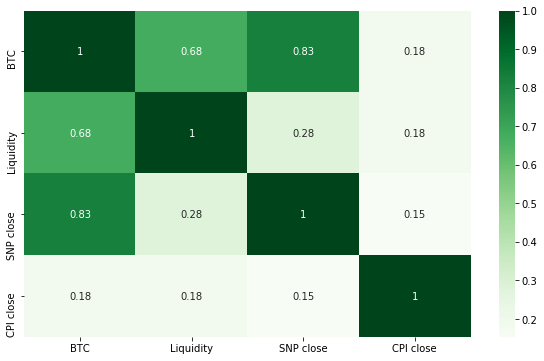

In [361]:
#Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlations = MarginMerged.corr() 
plt.figure(figsize=(10,6))
sns.heatmap(correlations, cmap = 'Greens', annot = True)

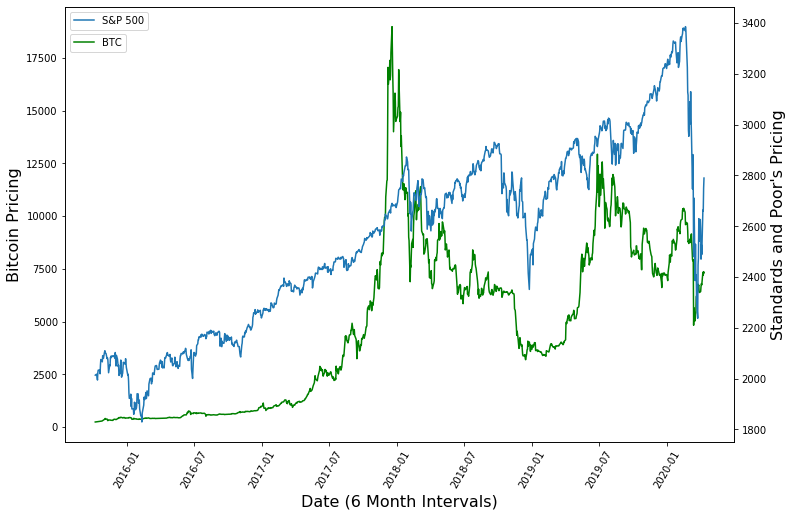

In [362]:
# Bitcoin & SNP Visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,8))
x1 = plt.plot(Merged['BTC'],color = 'Green', label = 'BTC')
ax.set_xlabel('Date (6 Month Intervals)', fontsize = 16)
ax. set_ylabel('Bitcoin Pricing', fontsize = 16)
plt.xticks(rotation=60)
ax.legend(loc = 'upper left', bbox_to_anchor=(.0001, .95))

ax2 = ax.twinx()
ax2.plot(Merged['SNP close'],  label = 'S&P 500')
ax2.set_ylabel("Standards and Poor's Pricing", fontsize = 16)
ax2.legend()

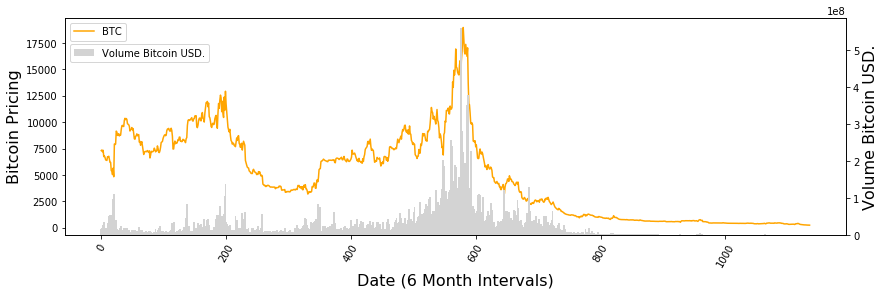

In [501]:
#Bitcoin and Liquidity Visualization

fig, ax = plt.subplots(figsize = (14,4))
x1 = plt.plot(Merged['BTC'],color = 'orange', label = 'BTC')
ax.set_xlabel('Date (6 Month Intervals)', fontsize = 16)
ax.set_ylabel('Bitcoin Pricing', fontsize = 16)
plt.xticks(rotation=60)
ax.legend(loc = 'upper left')

ax2 = ax.twinx()
ax2.bar(Merged.index, Merged['Liquidity'],  label = 'Volume Bitcoin USD.', width = 3, color = 'lightgrey')
ax2.set_ylabel("Volume Bitcoin USD.", fontsize = 16)
ax2.legend(bbox_to_anchor=(.191, .9))

Text(0, 0.5, 'Margin Debit Balances')

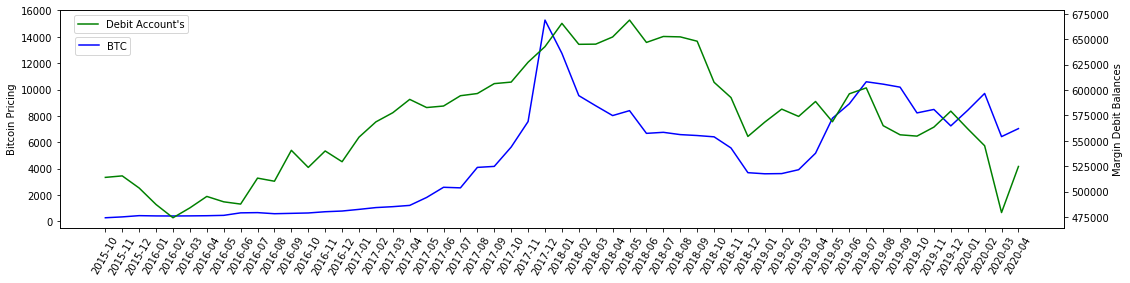

In [507]:
# Bitcoin and Margin Accounts Visualiation
import matplotlib

fig, ax = plt.subplots(figsize=(18,4))
plt.plot(MarginMerged['Date'], MarginMerged['BTC'], color = 'blue', label = 'BTC')
ax.legend(loc = 'upper left', bbox_to_anchor=(.01, .90))
plt.xticks(rotation = 60)
ax.set_ylabel('Bitcoin Pricing')

ax2 = ax.twinx()
plt.plot(MarginMerged['Date'], MarginMerged['Debit Balances in Customers\' Securities Margin Accounts'].astype(float), color = 'green', label = 'Debit Account\'s')
ax2.legend(bbox_to_anchor=(.133, .999))
ax2.set_ylabel('Margin Debit Balances')


# Model 1 with Margin Accounts

In [472]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


inputs = MarginMerged.drop(['BTC', 'Date'], 1)
output = MarginMerged['BTC']

#Standardizing x-values for easier gradient convergence 
sc=StandardScaler()
x = sc.fit_transform(inputs)

In [470]:
#Stochastic Gradient Descent with Margin Accounts
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'alpha': [.0001, .001, .1], 'max_iter': [10000, 100000, 1000000]}

x_train, x_test, y_train, y_test = train_test_split(x, output, test_size = .2, shuffle = True)

sgd = SGDRegressor()

grid_search = GridSearchCV(sgd, param_grid, cv = 3)
 
grid_search.fit(x_train, y_train)

model = grid_search.best_estimator_

predictions = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

645.1168775683155

# Model 2 w/o Margin accounts

In [500]:
#Stochastic Gradient Descent with liquidity
independent_vars= Merged.drop(['BTC', 'Date'], 1)
dependent_var = Merged['BTC']

sc1 = StandardScaler()
x1 = sc1.fit_transform(independent_vars)

param_grid = {'alpha': [.0001, .001, .1], 'max_iter': [10000, 100000, 1000000]}

x_train, x_test, y_train, y_test = train_test_split(x1, dependent_var, test_size = .2, shuffle = True)

sgd = SGDRegressor()

grid_search = GridSearchCV(sgd, param_grid, cv = 3)
 
grid_search.fit(x_train, y_train)

model = grid_search.best_estimator_

predictions = model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse


1664.2507481815917


The decision behind formulating two models was to see if depth in data had a bigger influence on the predictability power 
of the gradient descent algorithm than if more impactful features would. First model had only 55 samples to learn amd yielded the lowest rmse proving the distinction that depth does not surpass richness of data. 
